In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

# The Eller's Algorithm
## How does it work?
The Eller's algorithm is a very useful algorithm to generate infinite mazes in one dimension relatively quickly, with minimal auxilliary space. It is thus a very memory efficient algorithm that relies on sets corresponding to the current row to forward information about the maze to the next iteration of generation. The algorithm involves giving each cell of a row a unique set ID. The adjacent cells with different set IDs are then randomly merged by set union or not. In each of these sets, we randomly carve one or more cells downwards to the next row, and assign those cells the same ID. The remaining cells of the new row are assigned new unique set IDs, and the process is repeated till completion, with the vertical procedure omitted for the last row.
## Is every node connected?
Yes, every node in the graph has to be connected. This can be seen through the fact that the algorithm revolves around sets and their union. Trivially, we know that each cell within a set is always connected to each other. As we are not creating any passage between any two cells that share a set, there is no possibility of loops or cycles. Towards the end of the maze, particularly in the last row, we observe that we are connecting each and every set to each other. Thus, by the last row, every set is eventually merged into a single set, which doesn't have cycles. This is done as sets are propagated along rows, and only the most recent row is relevant for furhter propagation.

In [2]:
def Eller(maze):
    # eset will store the set ID's of the current row, while tempset does the same for the previous row
    eset = []
    tempset = []
    cnt = 0
    # initialize unique set numbers to the first row 
    for k in range(0,maze.num_columns):
        eset.append(cnt)
        cnt += 1
    for y in range(0,maze.num_rows-1):
        for x in range(0,maze.num_columns-1):
            # if adjacent sets are not unique, check whether to carve east or not
            if eset[x+1] != eset[x]:
                check = random.randint(0,1)
                if check == 0:
                    # connecting two sets disjoint sets
                    maze.add_path((x,y), 'E', 0)
                    chval = eset[x+1]
                    for l in range(0,maze.num_columns):
                        if eset[l] == chval:
                            eset[l] = eset[x]
        setlist = set(eset)
        tempset = [None]*maze.num_columns
        # iterating through unique set ID's
        for x in setlist:
            setid = []
            offset = -1
            # setid stores all the indices of cells corresponding to the set ID
            while True:
                try:
                    offset = eset.index(x, offset+1)
                except ValueError:
                    break
                setid.append(offset)
            # generating random number of, and list of cells from selected set to be carved downwards
            vcount = random.randint(1,len(setid))
            vlist = random.sample(setid,vcount)
            # carving path downwards and assigning set ID to bottom cell equal to current cell
            for k in vlist:
                maze.add_path((k,y), 'S', 0)
                tempset[k] = eset[k]
        # assigning new set ID's to each cell that hadn't been carved downwards in previous step
        for k in range(0,maze.num_columns):
            if tempset[k] == None:
                tempset[k] = cnt
                cnt += 1
            eset[k] = tempset[k]
    # iterating through last row and carving eastward for all unique adjacent set ID's
    for k in range(0,maze.num_columns-1):
        if eset[k] != eset[k+1]:
            maze.add_path((k,maze.num_rows-1), 'E', 0)
            chval = eset[k+1]
            for l in range(0,maze.num_columns):
                if eset[l] == chval:
                    eset[l] = eset[k]

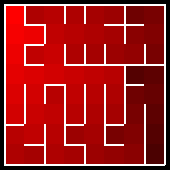

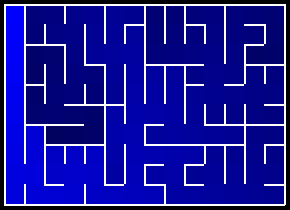

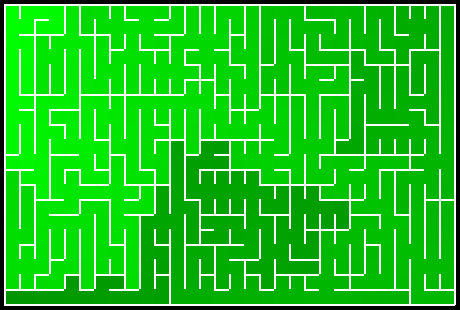

In [3]:
maze = Maze(8,8)
Eller(maze)
maze.add_colors()
display(maze.draw(cell_width = 20))
        
maze = Maze(10,14)
Eller(maze)
maze.add_colors(color=(0, 0, 255))
display(maze.draw(cell_width = 20))

maze = Maze(20,30)
Eller(maze)
maze.add_colors(color=(0, 255, 0))
display(maze.draw(cell_width = 15))

## Basic Analysis

### Time Complexity : O(N<sup>2</sup>)

In this algorithm, we iterate over each and every node approximately once, i.e., in a linear fashion. This can be seen when we assign set IDs to each new node. There is further iteration over the nodes, which can be seen when randomly merging sets eastward, but in general, we get the time complexity of this algorithm to be equal to the number of nodes.

### Additional Space : O(N)

The additional space here is always O(N). This can be seen as our maximum auxilliary space is the set containing the set IDs of the current and previous row. There is no other case where we will have more or less additional space, and thus we get additional space as equal to the size of a row.

### Bias

This algorithm can be observed to frequently have vertical or horizontal bias. The output of this algorithm is very critically dependent on the method through which the random numbers is generated, and providing bias for either the eastward merge of cells or the southward merge can make the maze gain a horizontal or vertical bias, respectively. This can be observed to a certain extent in the first maze, where there is a lot of vertical bias as there is a tendency for single cell sets to propogate down the maze for a relatively long distance before being carved eastward.

In [4]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    Eller(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  28.243200
Straightways  :  24.360200
   LeftTurns  :  11.253300
  RightTurns  :  11.204600
   Junctions  :  21.654200
  Crossroads  :  3.284500


### Further analysis
As we can see in the statistics, Eller's algorithm has a bias towards straighter passageways, and doesn't turn as much as other algorithms. There is very clearly a bias from north-south and east-west and this would make traversal in a maze generated by this algorithm relatively simple. There is also a bias towards long passageways near the edges of the maze, as the maze is generated row by row. 